# Ensemble Methods 

## Why Use Ensemble Methods 

1. Traditional Decision Trees are prone to overfitting 

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
data['target'] = iris['target']

In [2]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),
                                                    data['target'], 
                                                    test_size=0.25, 
                                                    random_state=11)

In [3]:
dt = DecisionTreeClassifier()

# fit on training data 
dt.fit(X_train, y_train)

# accuracy on training data 
print(f'Accuracy with training data: {dt.score(X_train, y_train)}')

# accuracy on testing data 
print(f'Accuracy with testing data: {dt.score(X_test, y_test)}')

Accuracy with training data: 1.0
Accuracy with testing data: 0.8421052631578947


2. Provide high accuracy and are very popular 
> These visuals are from this [notebook](https://www.kaggle.com/antgoldbloom/what-algorithms-are-most-successful-on-kaggle)

### Most Popular Algorithms Used on Kaggle

![kaggle](Img/Most_Popular_Kaggle.png)

### Most Popular Algorithms Used on Kaggle over Time

![kaggle](Img/popular_kaggle_time_series.png)

#### Accuracy vs Interpretability 
![accuracy vs interpretability](Img/accuracy_interpretability.png)
[Source](https://ff06-2020.fastforwardlabs.com/)

## Ensemble Method #1 - Bagging 
![random_forest](Img/random-forest.png)
[Source](https://www.javatpoint.com/machine-learning-random-forest-algorithm)

#### Steps for Random Forest 
1. Select number of decision trees to build.  Sklearn by default does [100](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Grab a random subset of the data points 
3. Train a decision tree on those data points 
4. Repeat Steps 2 and 3 for the number of trees you decided in step 1
> Important Note: the random forest only uses a subset of the features when making splits - this is the `max_features` hyperparameter 

#### Example of Random Forest 

In [4]:
# decision tree 1 
# sample of data 
train_data = X_train.join(y_train)
data_1 = train_data.sample(frac = 1, replace = True)
dt1 = DecisionTreeClassifier()
dt1.fit(data_1.drop('target', axis = 1), data_1['target'])
dt1_pred = dt1.predict(X_test)

In [5]:
# decision tree 2 
# sample of data 
data_2 = train_data.sample(frac = 1, replace = True)
dt2 = DecisionTreeClassifier()
dt2.fit(data_2.drop('target', axis = 1), data_2['target'])
dt2_pred = dt2.predict(X_test)

In [6]:
# decision tree 3 
# sample of data 
data_3 = train_data.sample(frac = 1, replace = True)
dt3 = DecisionTreeClassifier()
dt3.fit(data_3.drop('target', axis = 1), data_3['target'])
dt3_pred = dt3.predict(X_test)

In [7]:
df_pred = pd.DataFrame({'dt1': dt1_pred, 'dt2': dt2_pred, 'dt3': dt3_pred})
df_pred

,dt1,dt2,dt3
0,2,2,2
1,2,2,2
2,1,1,2
3,2,1,1
4,2,2,2
5,0,0,0
6,1,1,1
7,0,0,0
8,0,0,0
9,1,1,1


In [8]:
# point 29 has different predictions, so by using a random forest we got it correct 
y_test.iloc[29]

1

In [9]:
# random forest in sklearn 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# accuracy on training data 
print(f'Accuracy with training data: {rf.score(X_train, y_train)}')

# accuracy on testing data 
print(f'Accuracy with testing data: {rf.score(X_test, y_test)}')

Accuracy with training data: 1.0
Accuracy with testing data: 0.9210526315789473


In [10]:
len(rf.estimators_)

100

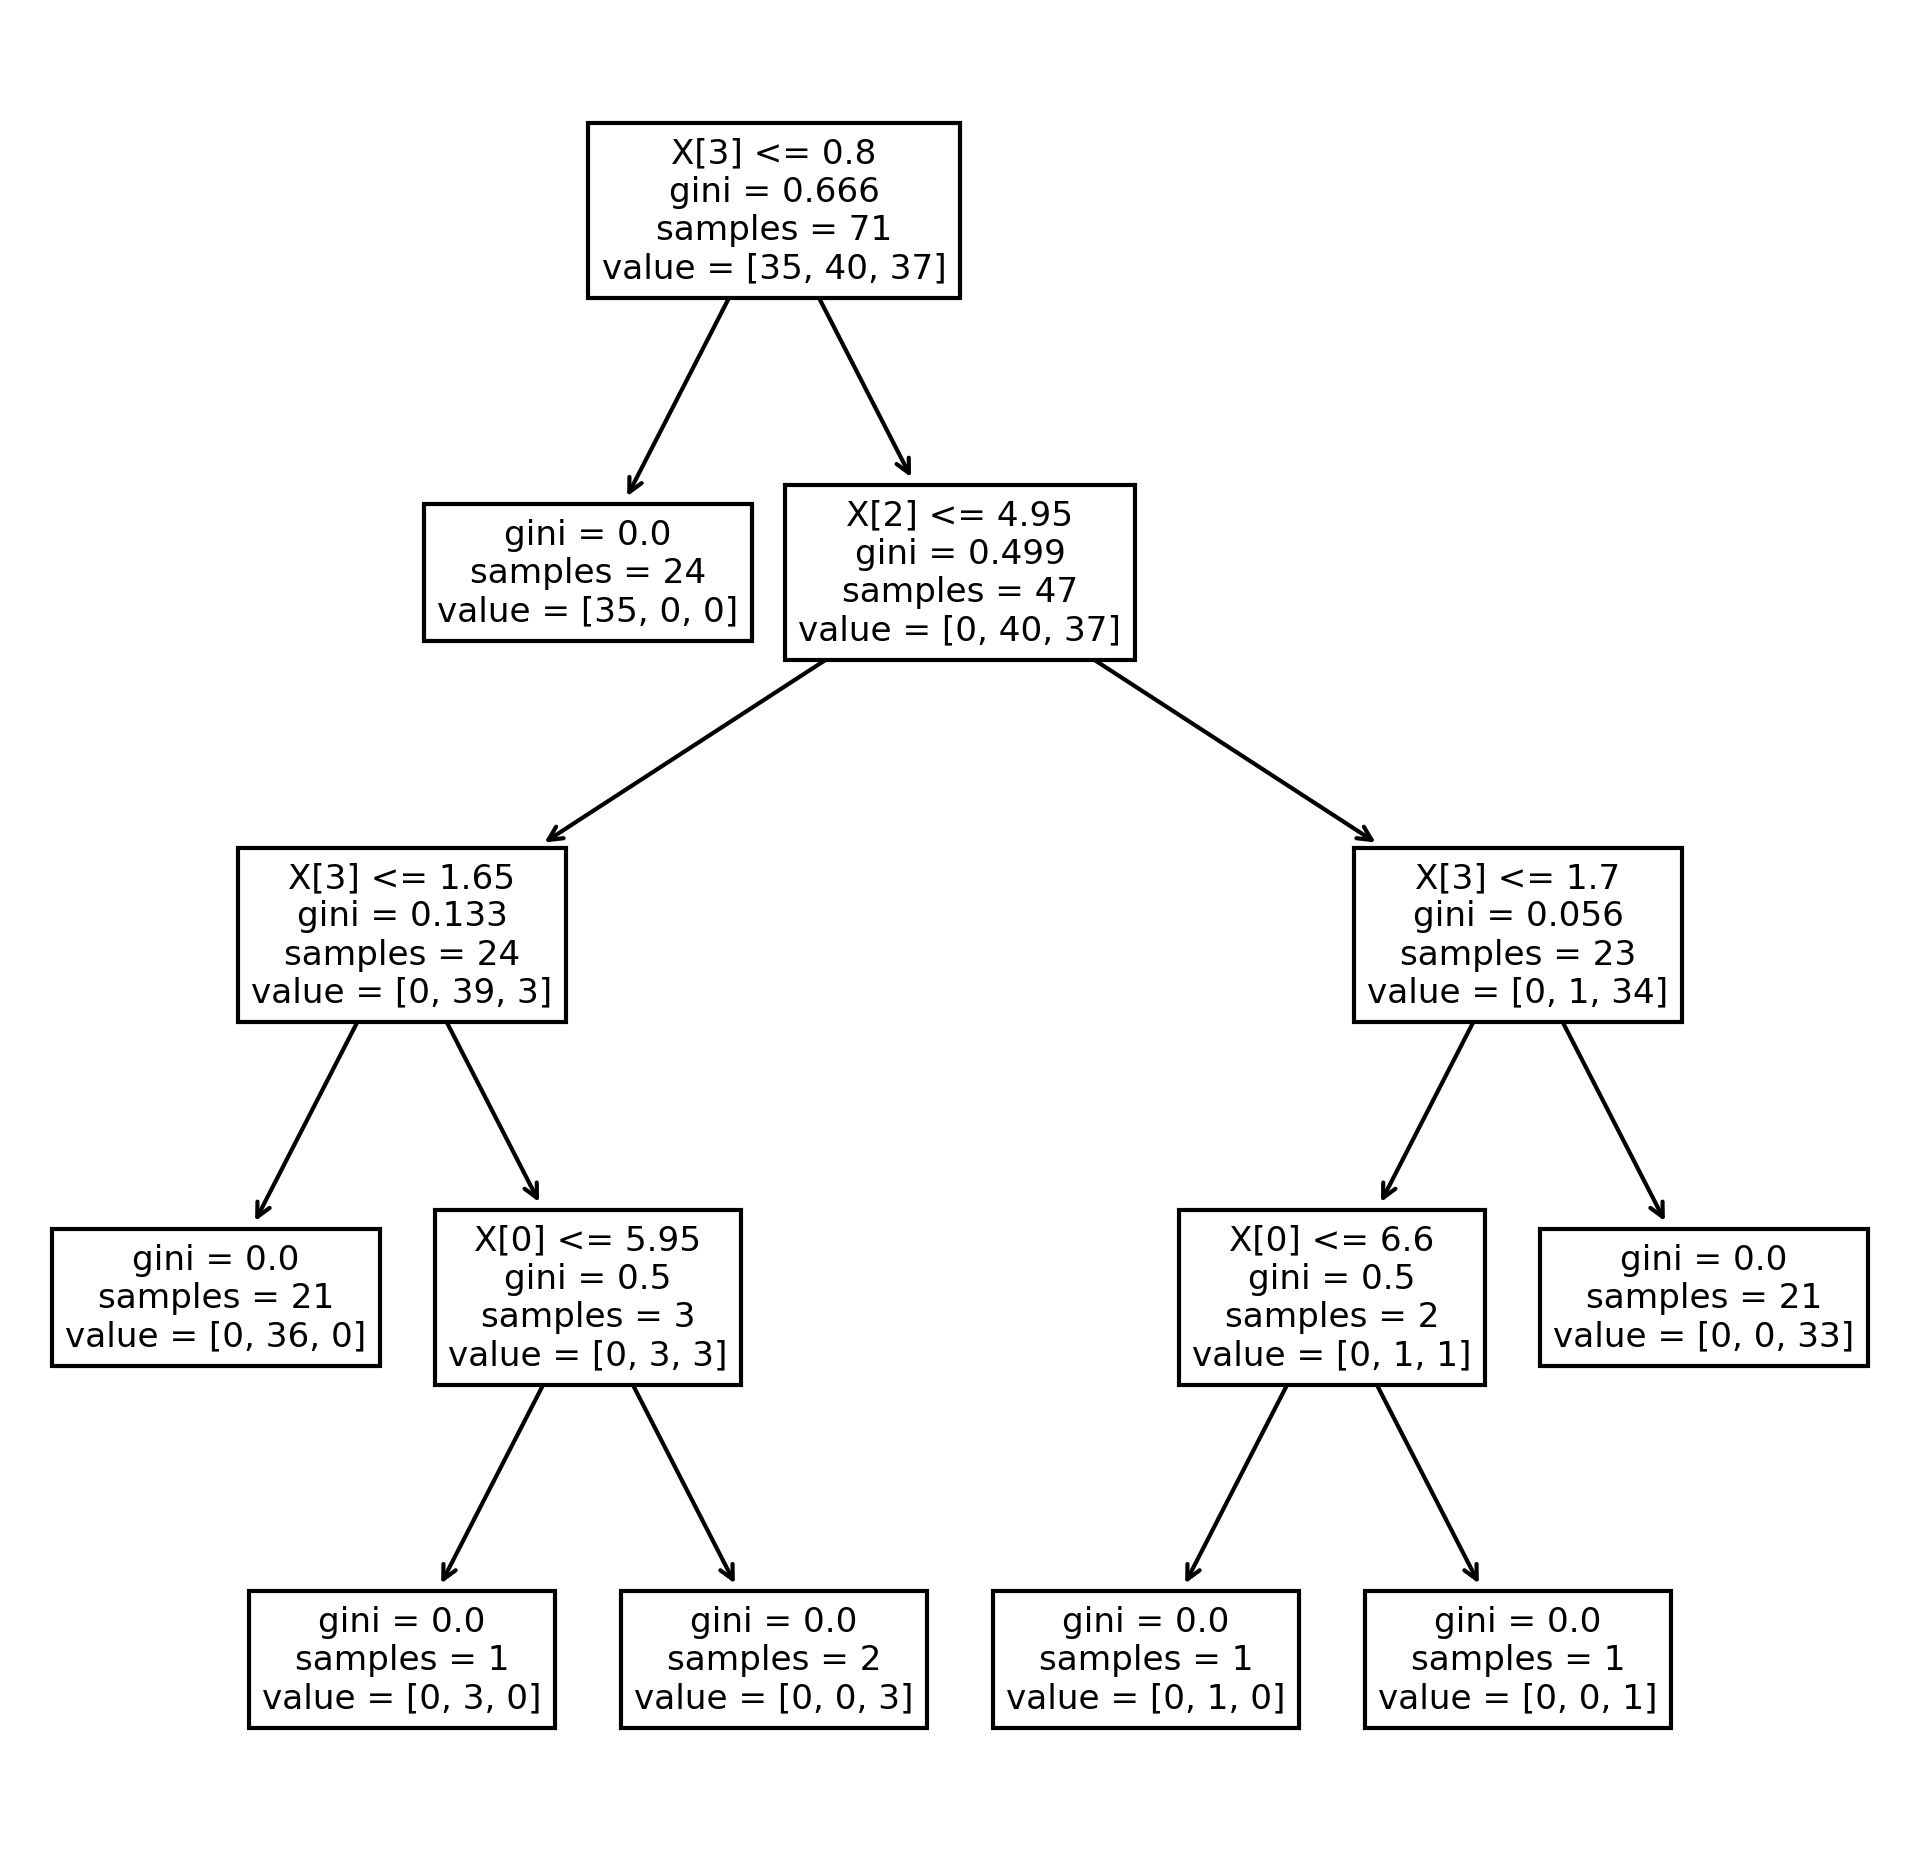

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(rf.estimators_[0]);

## Ensemble Method #2 - Boosting
1. Train a single weak learner
2. Figure out which examples the weak learner got wrong
3. Build another weak learner that focuses on the areas the first weak learner got wrong
4. Continue this process until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the model's performance has plateaued

#### Bagging and Boosting Difference 
- Independent vs. iterative
- Weak vs Strong 
- Aggregate prediction

### Adaboost
<img src='Img/new_adaboost.png' width="600">

1. Each data point has a weight assigned at the beginning all weights are equal 
2. A subset of the data is grabbed based on the weights 
3. A weak model is trained on the data 
    - If model gets the data point correct the weight is decreased
    - If model gets the data point incorrect the weight is increased 
4. Points that the model got incorrect then have a higher probability of being grabbed for the next model.
> This causes the harder points (the ones it gets incorrect) to be chosen more often 

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# accuracy on training data 
print(f'Accuracy with training data: {ada.score(X_train, y_train)}')

# accuracy on testing data 
print(f'Accuracy with testing data: {ada.score(X_test, y_test)}')

Accuracy with training data: 0.9910714285714286
Accuracy with testing data: 0.9210526315789473


In [16]:
len(ada.estimators_)

50

In [18]:
ada.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

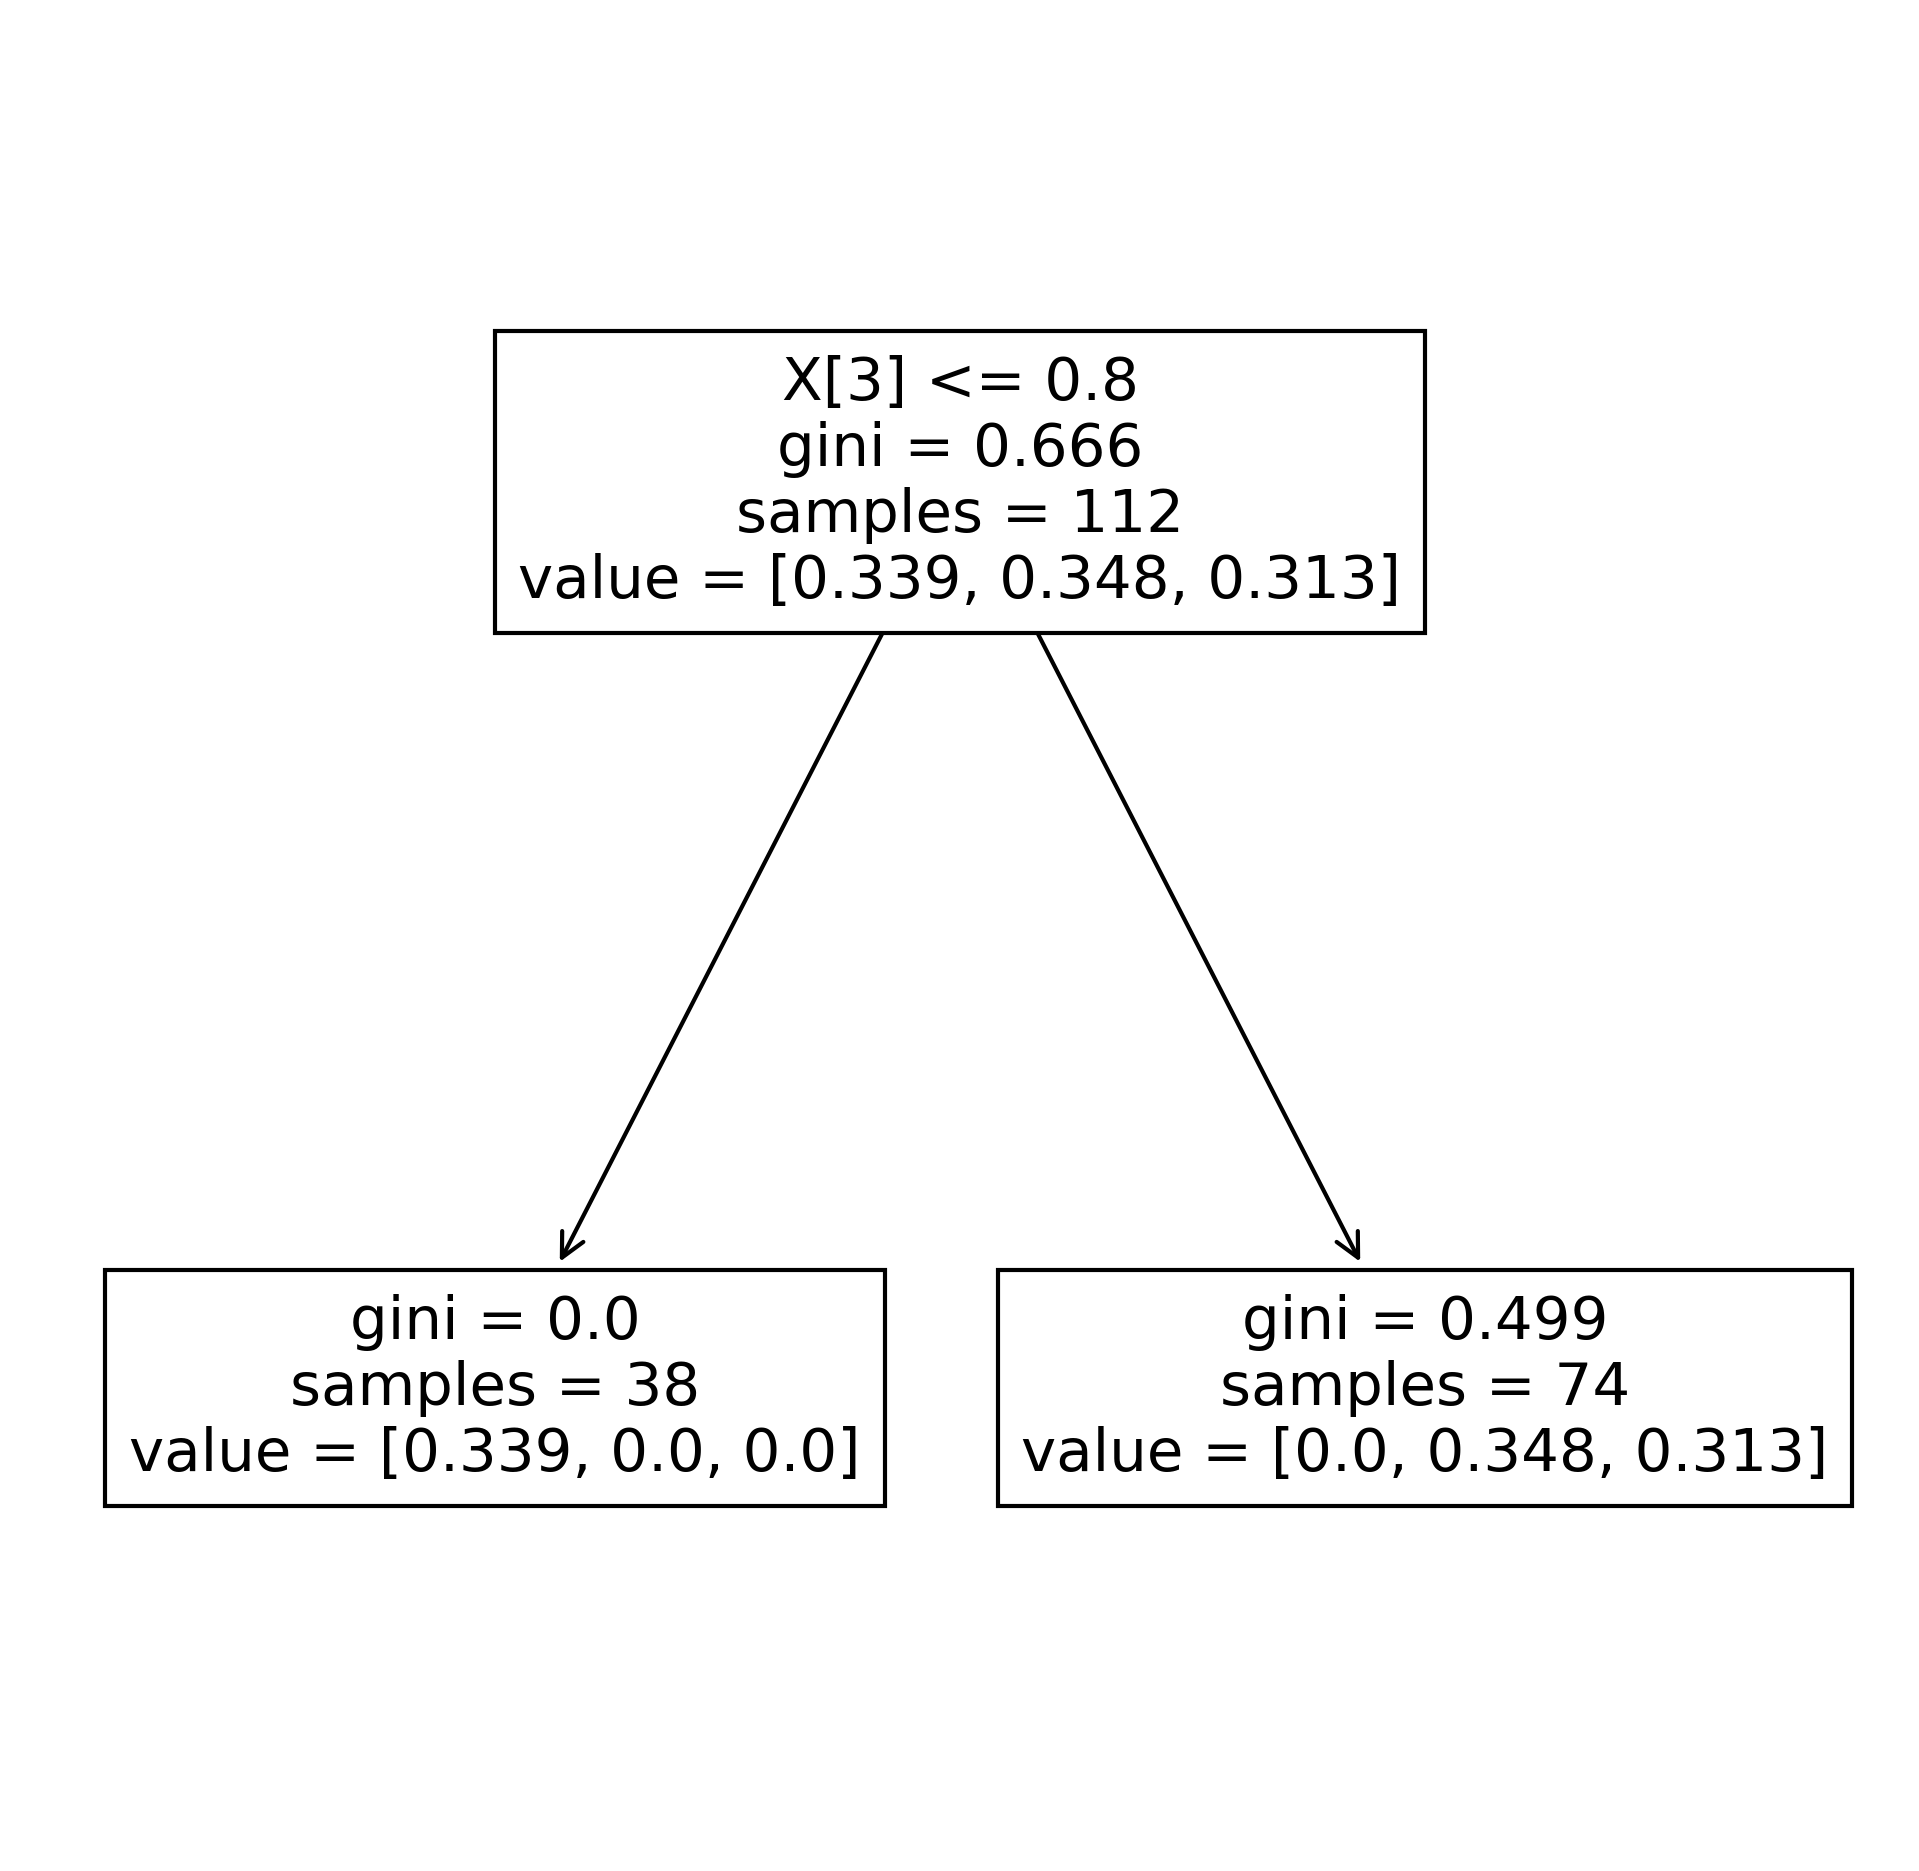

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(ada.estimators_[0]);

### Gradient Boosting 
<img src='Img/new_gradient-boosting.png'>

1. Fit a model (model 1) to the data 
2. Fit a model (model 2) to the residuals from model 1
3. Combine the 2 models 
4. Repeat steps 2 and 3 

> Code adapted from https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb

In [19]:
import numpy as np 
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

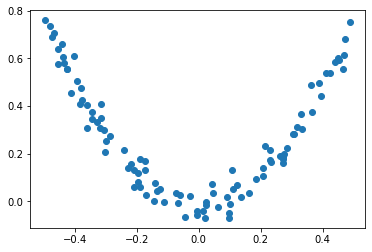

In [20]:
plt.scatter(X, y);

#### Fit regression line to this data 

Start with fitting 3 decision trees to the data 

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [22]:
# fit to the residuals of first decision tree
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
# fit to the residuals of the second decision tree 
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
X_new = np.array([[0.8]])

y1_pred = tree_reg1.predict(X_new)
y2_pred = tree_reg2.predict(X_new)
y3_pred = tree_reg3.predict(X_new)

print(f'Prediction from first decision tree {y1_pred[0]}')
print(f'Prediction from second decision tree {y2_pred[0]}')
print(f'Prediction from third decision tree {y3_pred[0]}')
print('')
print(f'Overall Prediction: {y1_pred[0] + y2_pred[0] + y3_pred[0]}')

Prediction from first decision tree 0.5285684615497233
Prediction from second decision tree 0.03991297453320822
Prediction from third decision tree 0.18178637460264255

Overall Prediction: 0.750267810685574


In [25]:
def plot_predictions(regressors, X, y):
    axes=[-0.5, 0.5, -0.1, 0.8]
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.scatter(X[:, 0], y)
    plt.plot(x1, y_pred, linewidth=2, color = 'k')
    plt.show()

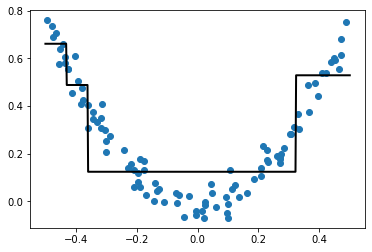

In [26]:
# first tree 
plot_predictions([tree_reg1], X, y)

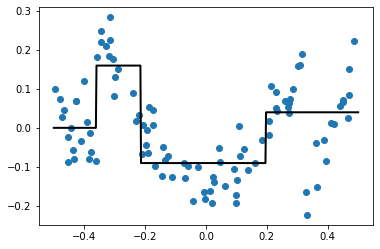

In [27]:
# second tree 
plot_predictions([tree_reg2], X, y2)

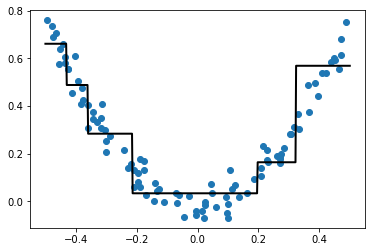

In [28]:
# combining tree 1 and tree 2
plot_predictions([tree_reg1, tree_reg2], X, y)

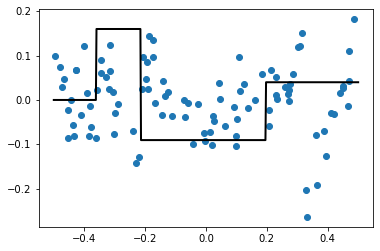

In [29]:
# third tree 
plot_predictions([tree_reg2], X, y3)

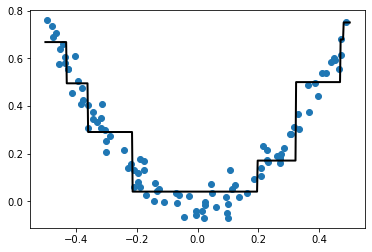

In [30]:
# combining trees 1, 2, and 3 
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y)

#### Overfitting vs Underfitting 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

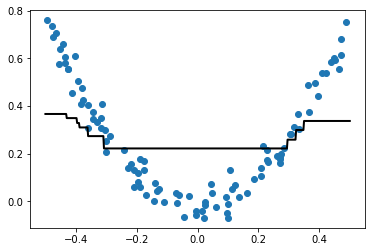

In [32]:
plot_predictions([gbrt], X, y)

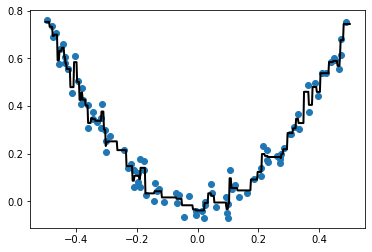

In [33]:
plot_predictions([gbrt_slow], X, y)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy on training data 
print(f'Accuracy with training data: {gb.score(X_train, y_train)}')

# accuracy on testing data 
print(f'Accuracy with testing data: {gb.score(X_test, y_test)}')

Accuracy with training data: 1.0
Accuracy with testing data: 0.9210526315789473


## Resources 
- [StatQuest video on Random Forests](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)
- [StatQuest video on AdaBoost](https://www.youtube.com/watch?v=LsK-xG1cLYA)
- [StatQuest video on Gradient Boosting](https://www.youtube.com/watch?v=3CC4N4z3GJc)
- [Great Book on ML in sklearn](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_4?dchild=1&keywords=Hands-On+Machine+Learning+with+Scikit-Learn+and+TensorFlow%3A+Concepts%2C+Tools%2C+and+Techniques+to+Build+Intelligent+Systems&qid=1618509260&s=books&sr=1-4)